# Krispy Kreme Project

Using the dataset [*krispykreme.csv*](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KrispyKreme.csv) 

In [3]:
#load libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import math as math
from plotnine import *

%matplotlib inline


from sklearn.linear_model import LogisticRegression
#Z-score variables
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error
# simple TT split cv
from sklearn.model_selection import train_test_split 
#k-fold cv
from sklearn.model_selection import KFold 
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import LeaveOneOut

from sklearn.mixture import GaussianMixture # EM/GMM
from sklearn.cluster import AgglomerativeClustering # hierarchical agglomerative clustering
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV

In [4]:
#2 
donut = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KrispyKreme.csv")

In [5]:
#remove missing values for Dietary Fiber 100g
donut = donut.dropna(subset= ["Dietary_Fiber_100g"])
#features
features = ["Total_Fat_100g", "Saturated_Fat_100g", "Trans_Fat_100g", "Cholesterol_100g", "Sodium_100g", "Carbohydrates_100g", "Protein_100g", "Sugar_100g", "Dietary_Fiber_100g"]
X2 = donut[features]
np.random.seed(100)
#MODEL 1: EM
EM = GaussianMixture(n_components = 3)
EM.fit(X2)
cluster = EM.predict(X2)
print(silhouette_score(X2, cluster))

0.8127822067689954


In [6]:
# MODEL 2: HAC
np.random.seed(100)
hac = AgglomerativeClustering(n_clusters = 3,
                              affinity = "euclidean",
                              linkage = "ward")
hac.fit(X2)
membership = hac.labels_
silhouette_score(X2, membership)

0.7968410548648862

In [7]:
#Add EM Clusters & HAC Clusters to dataframe
donut["EMclusters"] = cluster
donut.groupby("EMclusters").mean() 
donut["HACclusters"] = membership
donut.groupby("HACclusters").mean() 

,Restaurant_ID,Serving_Size,Serving_Size_text,Calories,Total_Fat,Saturated_Fat,Trans_Fat,Cholesterol,Sodium,Potassium,...,Saturated_Fat_100g,Trans_Fat_100g,Cholesterol_100g,Sodium_100g,Potassium_100g,Carbohydrates_100g,Protein_100g,Sugar_100g,Dietary_Fiber_100g,EMclusters
HACclusters,,,,,,,,,,,,,,,,,,,,,
0,49.0,93.16,NaN,323.200000,16.080000,7.580000,0.02,7.200000,154.400000,68.75,...,8.560000,0.04,4.800000,163.160000,88.5,43.00000,5.120000,23.72,1.400000,0.84
1,49.0,16.00,NaN,244.758621,4.324138,2.775862,0.00,17.655172,146.137931,NaN,...,0.696552,0.00,3.862069,32.234483,NaN,9.37931,1.917241,8.60,0.234483,0.00
2,49.0,53.50,NaN,202.500000,9.500000,3.750000,0.00,17.500000,250.000000,40.00,...,7.000000,0.00,32.000000,462.750000,78.0,50.50000,4.250000,25.75,1.000000,2.00


#### a) explain which 2 algorithms you chose to use and why (including which distance metrics you chose, similarity metrics..etc if applicable and why)
I chose to use Expectation Maximization with mixtures of Gaussian and Hierarchical Agglomerative Clustering algorithms to create my models because Expectation Maximization with mixtures of Gaussian does not assume all variance is the same and does not give each data point a hard assignment unlike K-Means. In other words, K-means assumes that all clusters are spherical and assigns each data point to a particular cluster while Expectation Maximization with mixtures of Gaussian assigns each data point a probability of being assigned to each cluster which allows each datapoint to have a say in the variance and mean of each cluster (the higher the probability the more impact it has on the mean and variance of that cluster). 

For the model using Hierarchical Agglomerative Clustering, I chose to use the Euclidean method as the distance metric because it is used when you have continuous data. I chose to use Euclidean instead of the Manhattan method because Manhattan is used usually when you have a large number of features or the data has high dimensionality and since this data set only has five variables I felt Euclidean was more appropriate. I chose to use Wards method as my linkage criteria because looks at when merging two clusters how much does the sum of squared errors increase if it was one cluster and to determine which merge of clusters reduce the sum of squared errors the most. 

I chose the number of clusters for both models based on which number of clusters produced the highest silhouette score. I chose silhoutette score as my measurement because it measures the seperation between each cluster and the cohesion amongst the data points in each cluster. The more similar each data point are in each cluster and the more different each cluster are from each other, the higher the silhouettte score. A higher silhouette score shows that we created clusters that group our data points well. To determine which number of clusters produced the higher silhouette score, I simply adjusted the number of n_clusters for each clustering algorithim until I got the highest silhouette score. Starting with one cluster, I continued to increase the number of clusters until I noticed that any number of clusters beyond 3 clusters started to have a declining silhouette score and any number of clusters below 3 also had a smaller silhouette score. Therefore, I found three clusters to produce the best silhouette score for both models. 

#### b) explain which variables you chose to include and why (you must use the same predictors for both models)

I chose to use the continuous variables "Total_Fat_100g", "Saturated_Fat_100g", "Trans_Fat_100g", "Cholesterol_100g", "Sodium_100g", "Carbohydrates_100g", "Protein_100g", "Sugar_100g" as my predictors because I didn't see any unusual patterns when plotted each variable. I also included "Dietary_Fiber_100g" after I removed the rows with that were missing values for that column. I removed these missing values because the number of missing values were under 30% of the dataset and wouldn't heavily impact the amount of data we have to create to clusters. I chose to use the variables with "_100g" at the end (represents the amount of that nutrient per 100 grams of the food) instead of the regular "Cholesterol" or "Protein" because it standardizes those variables to be measured on the same scale. I chose to leave out "Potassium" because it had missing values in over 50% of the data. I left out "restaurant","Restaurant_ID", "Serving_Size_text, "Food_Category", "Restaurant_Item_Name" and "Item_Name" because it was not continuous data. Lastly, I chose to not include 'Calories' as a variable in the models because I noticed it increased the silhouette score for both models by more than 10%. 
#### c) explain whether or not you decided to z-score your variables and why.

I did not z-score my variables because all of the predictors I chose were on the same scale since the values are standardized by the amount of that nutrient per 100 grams of the food. 

#### d) use silhouette scores to choose the number of clusters. Is the number of clusters the same for both of your models?

The number of clusters is the same for both of my models. 

#### e) explain how your models performed, and what metric you used to decide that.

I used the silhouette score to determine how well both models performed. Silhouette scores are measured on a scale of -1 to 1 where the closer the score is to 1 means that the clusters the model created have high cohesion within each cluster and high seperation between the clusters and if the score is close to 0 or -1 then that means there is no cohesion and seperation in the clusters created by the model. Both models had fairly high silhouette scores. However, the Expectation Maximization with mixtures of Gaussian model performed the best out of the two because it had a higher silhouette score of 0.81278 while the Hierarchical Agglomerative Clustering model had a silhouette score of 0.79684. 

#### f) compare the models: how similar were the clusters between the two models?
Overall both models' clusters were very similar. The only difference is that the Expectation Maximization with mixtures of Gaussian model had a cluster that had a few datapoints that the Hierarchical Agglomerative Clustering model put in a different cluster. 
#### g) use ggplot to build a graph that helps demonstrate your point for part f, and write a caption for this graph.

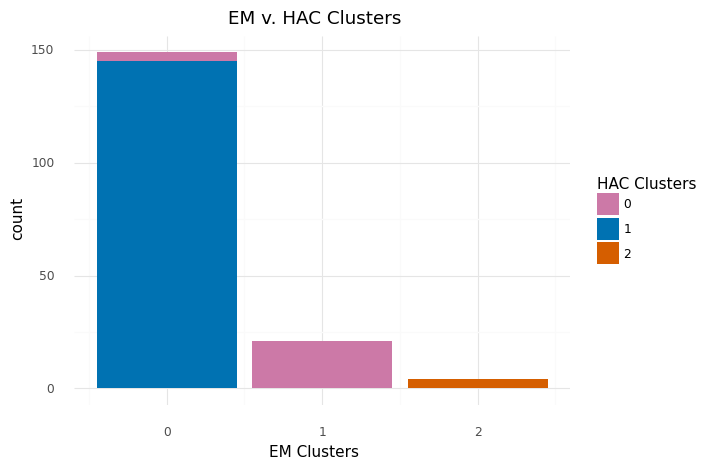

<ggplot: (8786053970001)>

In [8]:
#EM v. HAC GGplot 
(ggplot(donut, aes(x = "EMclusters", fill = "factor(HACclusters)")) + geom_bar()
+ labs(x = "EM Clusters", fill = "HAC Clusters")
+ theme_minimal()
+ ggtitle("EM v. HAC Clusters")
+ scale_fill_manual(values = ["#cc79a7", "#0072b2", "#d55e00", "#009e73"]))

Caption: To further explain both models' performance discussed in part f, this bar chart shows how Expectation Maximization with mixtures of Gaussian model (EM) and Hierarchical Agglomerative Clustering model (HAC) both clustered the data. While both models clustered the same data points to form cluster 2 (orange), this chart shows that EM cluster 0 contains some of the datapoints that HAC categorized as EM cluster 1 (pink). This slight discrepancy between how the models clustered the datapoints is why there was a difference in silohuette scores between both models. 

#### h) for both models, plot the clusters with ggplot and describe each cluster (using bullet points). Talk about what characterizes each cluster 

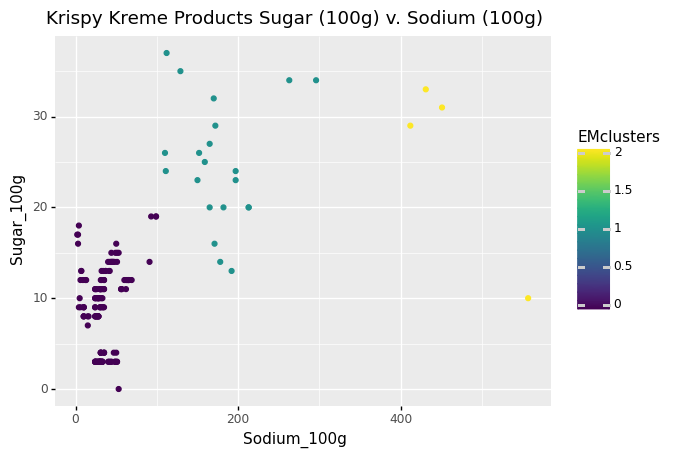

<ggplot: (8786054240589)>

In [9]:
X2["EMclusters"] = cluster
(ggplot(X2, aes(x = "Sodium_100g", y= "Sugar_100g", color = "EMclusters" )) + geom_point()
+ ggtitle("Krispy Kreme Products Sugar (100g) v. Sodium (100g)"))

•The products in the purple cluster seems to have both low sodium and low to average amount of sugar. This cluster is likely to be the the beverages that Krispy Kreme has on their menu and/or the healthier/gluten free donuts.

• The products in the teal cluster seems to have slightly more sodium relative to the purple cluster and more sugar. This cluster is likely to be the regular and specialty donuts. 

• The products in the yellow cluster have the most sodium and fairly high amount of sugar. After looking at the data, these products appear to be cake donuts which are very high in sodium compared to regular yeast donuts. 

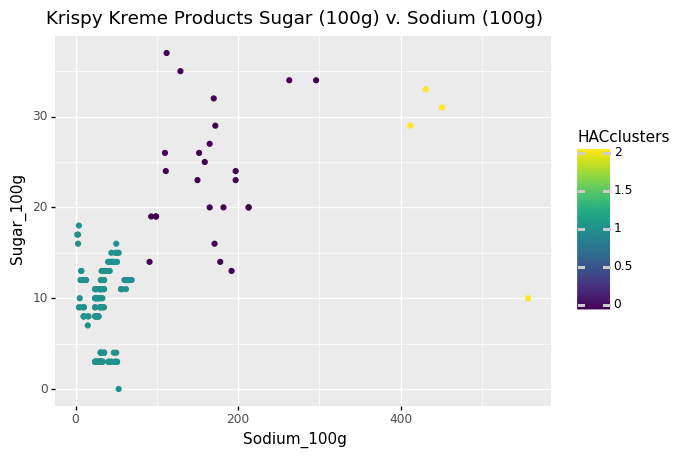

<ggplot: (8786054507389)>

In [11]:
X2["HACclusters"] = membership
(ggplot(X2, aes(x = "Sodium_100g", y= "Sugar_100g", color = "HACclusters" )) + geom_point()
+ ggtitle("Krispy Kreme Products Sugar (100g) v. Sodium (100g)"))

•The products in the teal cluster seems to have both low sodium and low to average amount of sugar. This cluster is likely to be the the beverages that Krispy Kreme has on their menu and/or the healthier/gluten free donuts.

• The products in the purple cluster seems to have slightly more sodium relative to the purple cluster and more sugar. This cluster is likely to be the regular and specialty donuts. 

• The products in the yellow cluster have the most sodium and fairly high amount of sugar. After looking at the data, these products appear to be cake donuts which are very high in sodium compared to regular yeast donuts. 